<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [11]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [12]:
boston_df=pd.read_csv(boston_url)

In [13]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2: Generate Descriptive Statistics and Visualizations
## For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

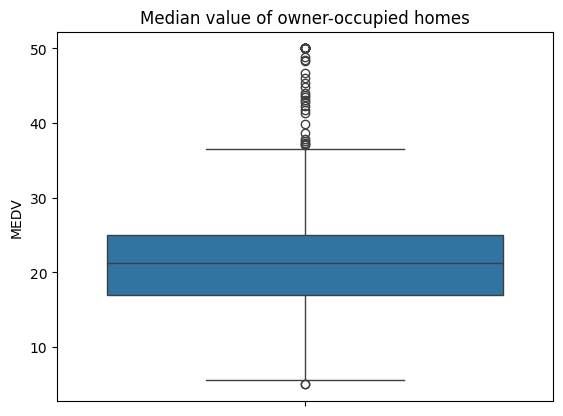

In [20]:
sns.boxplot(boston_df['MEDV'])
pyplot.title('Median value of owner-occupied homes')

## Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Bar Plot for the Charles river Variable')

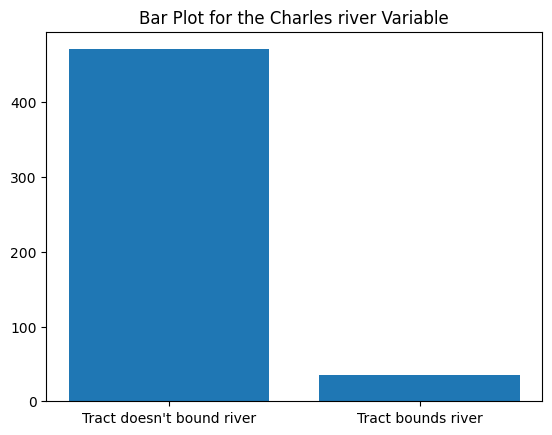

In [59]:
occurence = boston_df['CHAS'].groupby(boston_df['CHAS']).count()
pyplot.bar(["Tract doesn't bound river", 'Tract bounds river'], [occurence[0], occurence[1]])
pyplot.title('Bar Plot for the Charles river Variable')

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, "Boxplot of Median value of owner-occupied homes in $1000's by Age Group")

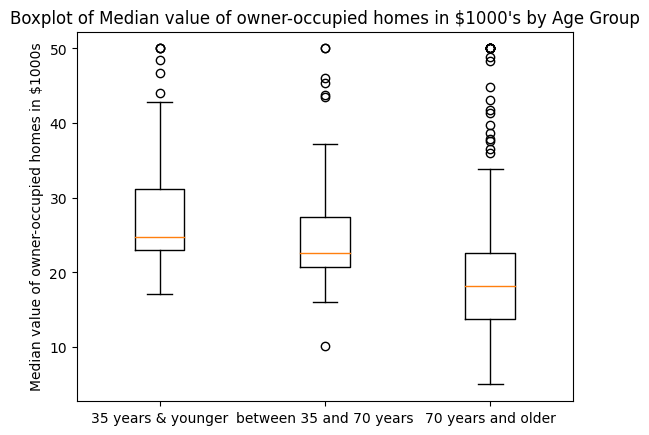

In [77]:
# Discretize the 'Age' variable into three groups
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
fig, ax = pyplot.subplots()

ax.boxplot([boston_df[boston_df['Age_Group'] == '35 years and younger']['MEDV'],
            boston_df[boston_df['Age_Group'] == 'between 35 and 70 years']['MEDV'],
            boston_df[boston_df['Age_Group'] == '70 years and older']['MEDV']])
ax.set_xticklabels(['35 years & younger', 'between 35 and 70 years', '70 years and older'])
ax.set_ylabel('Median value of owner-occupied homes in $1000s')
ax.set_title("Boxplot of Median value of owner-occupied homes in $1000's by Age Group")

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 0, 'Proportion of non-retail business acres per town')

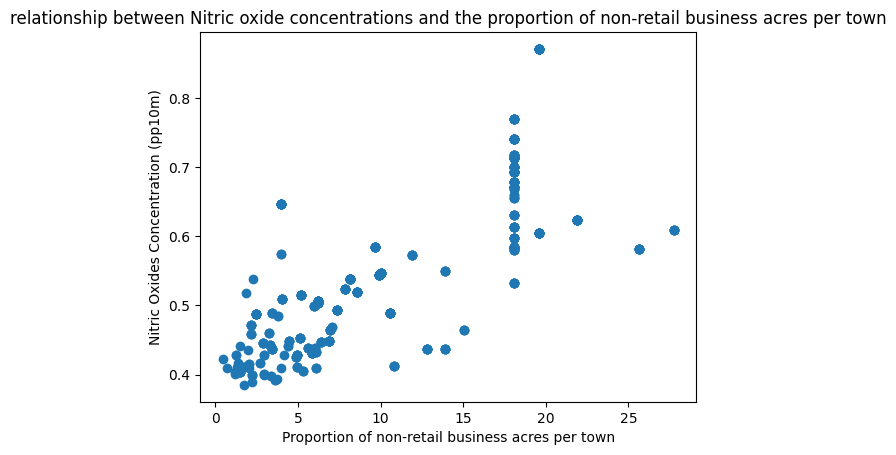

In [83]:
pyplot.scatter(boston_df['INDUS'], boston_df['NOX'])
pyplot.title('relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.ylabel('Nitric Oxides Concentration (pp10m)')
pyplot.xlabel('Proportion of non-retail business acres per town')

You can see that there is more or less a positive correlation between the two variables. this means that if the proportion of non-retail business is low the nitric oxides concentration will also be relatively low. At a proportion of non-retail business of around 18% you can see that there is a high variance of nitric oxide concentration. But in general the positive correlation is visible.   

## Create a histogram for the pupil to teacher ratio variable

Text(0.5, 0, 'PTRATIO')

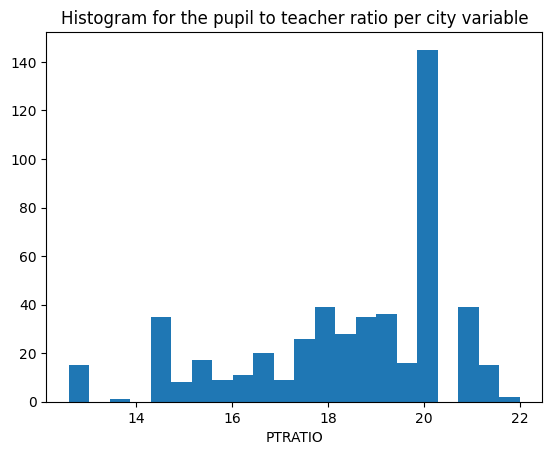

In [98]:
import math

# number of bins can be calculated with Sturges' Rule --> Square root of number of data points
bins = round(math.sqrt(len(boston_df['PTRATIO'])))
pyplot.hist(boston_df['PTRATIO'], bins)
pyplot.title('Histogram for the pupil to teacher ratio per city variable')
pyplot.xlabel('PTRATIO')

# Task 3: Use the appropriate tests to answer the questions provided
## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: The median value of houses bounded by the Charles river is equal to the median value of the houses not bounded by the Charles river.
HA: The median values are not equal.
Alpha: 0,05

In [103]:
groupOne = boston_df[boston_df['CHAS'] == 1]['MEDV']
groupZero = boston_df[boston_df['CHAS'] == 0]['MEDV']
scipy.stats.ttest_ind(groupOne, groupZero)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

The Results show that the P-value is less than the alpha value (7.39e-05 < 0,05) which means we reject the null hypothesis. Thus we can not say that the median values are equal and have to infer that there is a statistical difference between the median values.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: The median values of the houses for each proportion of owner occupied units is the same.
HA: The median values are not the same.
Alpha: 0.05

In [106]:
f_statistics, p_value = scipy.stats.f_oneway(boston_df[boston_df['Age_Group'] == '35 years and younger']['MEDV'], 
                                             boston_df[boston_df['Age_Group'] == 'between 35 and 70 years']['MEDV'],
                                             boston_df[boston_df['Age_Group'] == '70 years and older']['MEDV'])
print("The f-statistics are: ", f_statistics, " and the p-value is: ", p_value)

The f-statistics are:  36.40764999196599  and the p-value is:  1.7105011022702984e-15


Since the p-value is less than alpha (1.71e-15 < 0.05), we reject the null hypothesis and infer there being a significant difference between the median values of the houses grouped by age groups that occupy units built prior to 1940.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: There is no correlation between Nitric oxide concentration and proportion of non-retail business acres per town.
HA: There is a correlation.
Alpha: 0.05

In [107]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the p-value is less than alpha (7.91e-98 < 0.05) we have to reject the null hypothesis and thus infer that there is a correlation between the two variables.

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Text(0.5, 0, 'weighted distance to the five Boston employment centres')

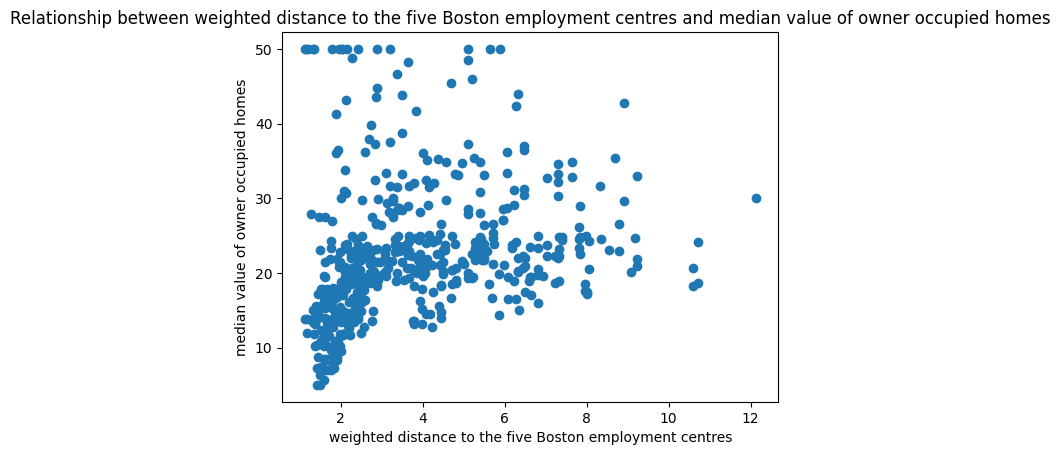

In [109]:
# Scatter plot
pyplot.scatter(boston_df['DIS'], boston_df['MEDV'])
pyplot.title('Relationship between weighted distance to the five Boston employment centres and median value of owner occupied homes')
pyplot.ylabel('median value of owner occupied homes')
pyplot.xlabel('weighted distance to the five Boston employment centres')

In [110]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        18:20:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R squared is 0.062 so the R value is ~0,25, wh9